In [50]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
pd.__version__

'2.1.4'

In [52]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [53]:
#plot according to this data
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [54]:
%pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [55]:
df = pd.read_excel('data.xlsx')
df.head()

,weight_of_product,price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   weight_of_product  7 non-null      int64
 1   price              7 non-null      int64
dtypes: int64(2)
memory usage: 244.0 bytes


In [57]:
df.isnull()

,weight_of_product,price
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False


In [58]:
df['weight_of_product'].head()

0    2
1    4
2    5
3    3
4    6
Name: weight_of_product, dtype: int64

In [59]:
df['price'].head()

0    35
1    60
2    20
3    50
4    50
Name: price, dtype: int64

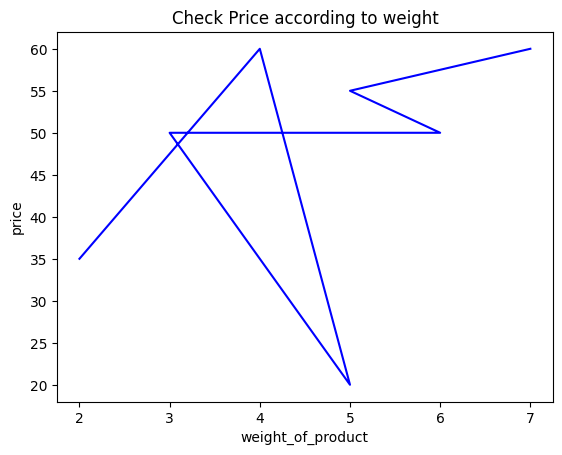

In [60]:
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt


plt.plot(df['weight_of_product'], df['price'], color='blue')
plt.xlabel('weight_of_product')
plt.ylabel('price')
plt.title('Check Price according to weight')
plt.show()

In [61]:
#taking value of x and y 
x = df['weight_of_product']
y = df['price']

#Linear Regression
1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

In [62]:
import numpy as np
x_bar = np.mean(x)
y_bar = np.mean(y)

# calculate deviation
x_dev = x - x_bar
y_dev = y - y_bar

slop = np.sum(x_dev * y_dev)/np.sum(x_dev**2)
slop


2.620967741935484

In [63]:
intercept = y_bar - (slop * x_bar)
intercept

35.16129032258065

Task-1: apply these values to predict the price when the vegetable weight is 6.

In [64]:

pred_y = (slop * 6) + intercept
pred_y

50.88709677419355

Task 02: Compute the residuals for each data point.

In [65]:
df['predicted_price'] = (slop * df['weight_of_product']+intercept)

In [66]:
df.head()


,weight_of_product,price,predicted_price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


Task 2 using sklearn

In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['weight_of_product']] , df[['price']]) 
df['predicted_price_using_Reg'] = reg.predict(df[['weight_of_product']])
df.head()

,weight_of_product,price,predicted_price,predicted_price_using_Reg
0,2,35,40.403226,40.403226
1,4,60,45.645161,45.645161
2,5,20,48.266129,48.266129
3,3,50,43.024194,43.024194
4,6,50,50.887097,50.887097


In [68]:
df['residiuls'] = df['price'] - df['predicted_price']

In [69]:
df.head()

,weight_of_product,price,predicted_price,predicted_price_using_Reg,residiuls
0,2,35,40.403226,40.403226,-5.403226
1,4,60,45.645161,45.645161,14.354839
2,5,20,48.266129,48.266129,-28.266129
3,3,50,43.024194,43.024194,6.975806
4,6,50,50.887097,50.887097,-0.887097


Task 03: Calculate both the Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In [71]:
#MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df['price'], df['predicted_price'])
mse

167.30990783410135

In [72]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df['price'], df['predicted_price'])
mae

9.87327188940092

Final Task: Generate an Excel file for the given dataset.

In [87]:
df1=df.head()
df1.to_excel('output.xlsx')